In [34]:
from src.utils.results_utils import *

from src.utils.data_utils import str_dict_to_values

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [35]:
df_char_cleaned = pd.read_csv('data/cleaned.csv')

df_char_cleaned['Languages'] = df_char_cleaned['Languages'].apply(str_dict_to_values)
df_char_cleaned['Country'] = df_char_cleaned['Country'].apply(str_dict_to_values)
df_char_cleaned['Genres'] = df_char_cleaned['Genres'].apply(str_dict_to_values)

# Uncover Character Features through Names

In film storytelling, a character’s name is rarely just a label ; it often serves as a subtle cue to their personality and role in the movie. Our project tackles the intriguing question : 

**Can a character’s archetype be predicted from their name ?**

Through this data analysis project, we aim to decode connections between specific name characteristics — such as length, structure, cultural origin and phonetics — and traits including gender, narrative role, movie genre specific role, and additional properties that we expect to uncover through deeper analysis. A sentiment analysis will also allow us to explore whether these name characteristics evoke positive or negative associations, potentially correlating with archetypes such as hero, villain, or more nuanced characters, if time permits.

## Presenting the cleaned dataset

Add 2-3 phrases pour expliquer notre dataset

In [36]:
df_char_cleaned.sample(5)

,Wikipedia_ID,Name,Languages,Country,Genres,Character_name,Sex,Actor_age
87535,8625450,Lost Signal,[],[United States of America],"[Horror, Slasher, Psychological thriller]",Sylvia,F,46.0
43251,1027060,Elizabeth: The Golden Age,"[Swedish Language, English Language, Spanish L...","[France, United Kingdom, Germany]","[Biographical film, Biography, History, Histor...",Elizabeth,F,38.0
108783,24061643,Alias John Law,[English Language],[United States of America],"[Romance Film, Action, Western, Adventure]",Kootney,M,NaN
113839,230546,Richard III,[English Language],"[United States of America, United Kingdom]","[Period piece, War film, Drama, Political dram...",Anne,F,35.0
49635,2679831,Parineeta,[Bengali Language],[India],"[Romance Film, Family Film]",Shekhar,M,33.0


In [37]:
name_counts = df_char_cleaned['Character_name'].value_counts()
top_100_names = name_counts.head(1000)

# Creating the interactive line plot with hover information
fig = go.Figure()

# Adding trace for the line plot with hover text
fig.add_trace(go.Scatter(
    x=top_100_names.index,
    y=top_100_names.values,
    mode='lines+markers',
    name='Character Count',
    line=dict(color='skyblue'),
    hovertext=[f"Name: {name}<br>Count: {count}" for name, count in zip(top_100_names.index, top_100_names.values)],
    hoverinfo="text"
))

# Setting up layout for the figure
fig.update_layout(
    title='Count of Most Popular Character Names',
    xaxis_title='Character Name',
    yaxis_title='Count',
    xaxis=dict(tickangle=45)
)

fig.show()

ajouter le plot des trends des character name selon les années 

## Understanding the Data : Proposing a Hypothesis (Motivation)

We’ll first conduct a preliminary analysis of the dataset to assess if it supports the hypothesis that specific character traits are linked to names. We’ll be starting with an overview of the data and identify trends between names and character features before examining potential causal relationships.

## Name/Movie Genre

In [38]:
#Let's make a list of the genres we are interested in and assign one of them to each character
genres_list = ['Action & Adventure', 'Drama', 'Comedy', 'Horror & Thriller', 
              'Fantasy & Sci-Fi', 'Historical & War', 'Romance', 'Documentary', 
              'Music & Performance', 'Cult & B-Movies', 'Other']
df_char_cleaned['Genre_Category'] = df_char_cleaned['Genres'].apply(lambda x: categorize_genre(x))

In [39]:
#Let's see the most frequent names in each genre and for each gender
frequent_names_m, frequent_names_f = get_top_names_by_genre(df_char_cleaned, 3)

In [40]:
data_f = create_sunburst_data(frequent_names_f)
data_m = create_sunburst_data(frequent_names_m)

In [41]:
# Create the sunburst plots
fig_females = go.Figure(go.Sunburst(
    labels=data_f['character'],
    parents=data_f['parent'],
    domain=dict(column=1),
    maxdepth=2
))

fig_males = go.Figure(go.Sunburst(
    labels=data_m['character'],
    parents=data_m['parent'],
    domain=dict(column=1),
    maxdepth=2
))

# Create a subplot with 1 row and 2 columns
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=["Females", "Males"],
    specs=[[{"type": "sunburst"}, {"type": "sunburst"}]]
)

# Add the sunburst charts to the subplots
fig.add_trace(fig_females['data'][0], row=1, col=1)
fig.add_trace(fig_males['data'][0], row=1, col=2)

# Update the layout (optional)
fig.update_layout(
    title_text="Comparison of Names by Gender",
    showlegend=False,
    width=1600,  # Largeur du graphique (en pixels)
    height=800   # Hauteur du graphique (en pixels)
)

# Display the plot
fig.show()

In [42]:
#Now, let's see the number of appearences of each name in our dataset, and in which genres they appear
genre_counts_result, movies_with_name = count_name_appearance_by_genre(df_char_cleaned, genres_list, 'Joe')
genre_counts_result.head(15)

,Action & Adventure,Drama,Comedy,Horror & Thriller,Fantasy & Sci-Fi,Historical & War,Romance,Documentary,Music & Performance,Cult & B-Movies,Other
0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
movies_with_name.head(5)

,Wikipedia_ID,Name,Languages,Country,Genres,Character_name,Sex,Actor_age,Genre_Category


On va 

In [44]:
def calculate_column_freq(df, column_name='Character_name'):
    """
    Calculate the count and frequency (percentage) of unique values in a specified column.
    """
    # Calculating the total number of entries in the specified column
    total_entries = df[column_name].count()
    
    # Counting occurrences of each unique value
    counts_df = df[column_name].value_counts().reset_index()
    counts_df.columns = [column_name, 'Count']
    
    # Adding a frequency column with the count divided by the total number of names, expressed as a percentage
    counts_df['Frequency (%)'] = counts_df['Count'] / total_entries * 100
    
    return counts_df

In [45]:
# Filtrer les lignes où le genre inclut "Thriller"
horror_thriller_df = df_char_cleaned[df_char_cleaned['Genre_Category'].apply(lambda genres: 'Horror & Thriller' in genres)]
horror_thriller_merged_df = horror_thriller_df.groupby('Character_name').size().reset_index(name='Horror & Thriller Count')

action_adventure_df = df_char_cleaned[df_char_cleaned['Genre_Category'].apply(lambda genres: 'Action & Adventure' in genres)]
action_adventure_merged_df = action_adventure_df.groupby('Character_name').size().reset_index(name='Action & Adventure Count')

# Grouper par 'Character_name' et compter le nombre d'occurrences
merged_df = pd.merge(
    action_adventure_merged_df, 
    horror_thriller_merged_df, 
    on='Character_name', 
    how='outer'  # Use outer join to include all names
)

# Deal with NaN values
merged_df = merged_df.fillna(0)

# Ne prendre que les noms dans un intervalle de confiance de 98%
result = calculate_column_freq(df_char_cleaned, 'Character_name')

cutoff_frequency = result['Frequency (%)'].quantile(0.98) 
print(cutoff_frequency)
filtered_names = result[result['Frequency (%)'] <= cutoff_frequency]

merged_df = filtered_names[['Character_name']].merge(merged_df, on='Character_name', how='inner')

from scipy.stats import chi2_contingency

contingency_table = merged_df.drop(columns=['Character_name']).values

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Stat: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

merged_df.head()

0.020337456510528266
Chi2 Stat: 10291.793398197266
P-Value: 1.0
Degrees of Freedom: 19332
Expected Frequencies:
[[ 5.78119208  3.21880792]
 [12.84709352  7.15290648]
 [14.77415755  8.22584245]
 ...
 [ 0.64235468  0.35764532]
 [ 1.28470935  0.71529065]
 [ 0.64235468  0.35764532]]


,Character_name,Action & Adventure Count,Horror & Thriller Count
0,Shobha,5.0,4.0
1,Juliet,11.0,9.0
2,Bryan,12.0,11.0
3,Roxanne,12.0,6.0
4,Hélène,10.0,3.0


## Gender Analysis

In [46]:
df_vowels, df_consonants = get_vowel_stats(df_char_cleaned)

print('Stats for vowels in character names by sex :')
df_vowels.head()

Stats for vowels in character names by sex :


,mean,std
Sex,,
F,2.712791,0.819139
M,2.408568,0.890082


In [47]:
print('Stats for consonants in character names by sex:')
df_consonants.head()

Stats for consonants in character names by sex:


,mean,std
Sex,,
F,3.348056,1.253225
M,3.669876,1.356432


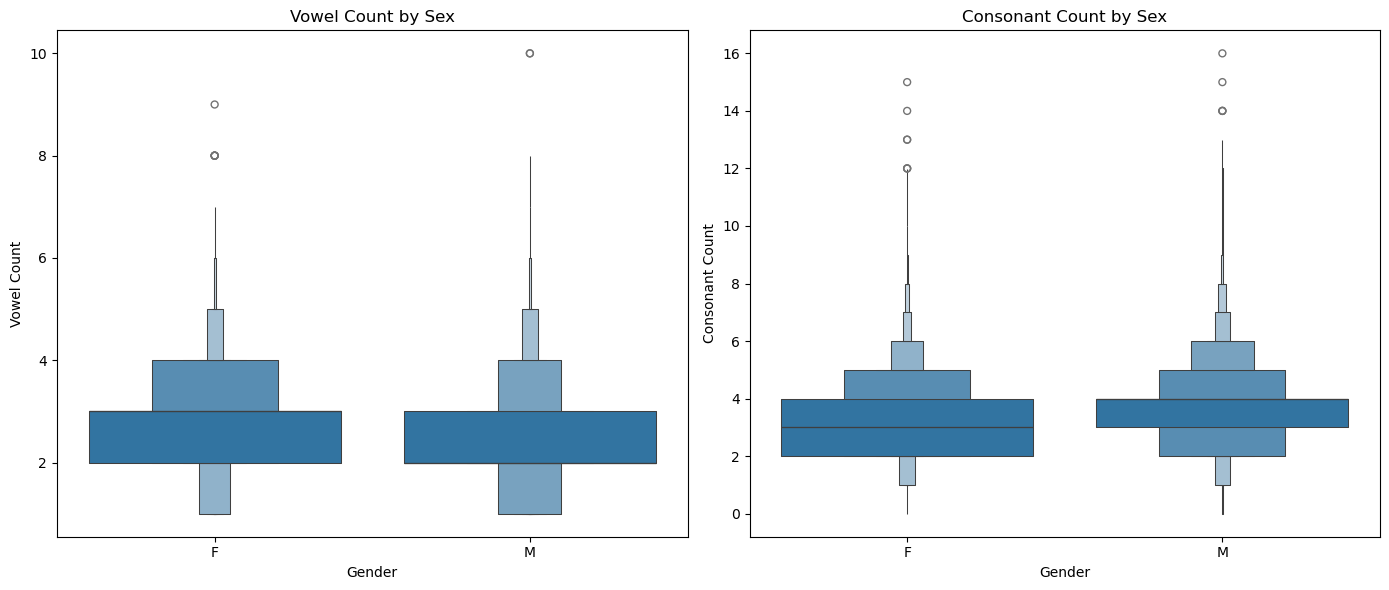

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for vowel count by sex
sns.boxenplot(data=df_char_cleaned, x='Sex', y='vowel_count', ax=axes[0])
axes[0].set_title('Vowel Count by Sex')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Vowel Count')

# Boxplot for consonant count by sex
sns.boxenplot(data=df_char_cleaned, x='Sex', y='consonant_count', ax=axes[1])
axes[1].set_title('Consonant Count by Sex')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Consonant Count')

plt.tight_layout()

In [49]:
df_length = get_length_stats(df_char_cleaned)

print('Length stats for character names by sex:')
print(df_length)

Length stats for character names by sex:
         mean       std
Sex                    
F    6.060847  1.653263
M    6.078445  1.849723


In [50]:
df_percent_vowel = get_vowel_percentage(df_char_cleaned)

print('Vowel percentage stats for character names by sex:')
print(df_percent_vowel)

Vowel percentage stats for character names by sex:
         mean       std
Sex                    
F    0.455334  0.107061
M    0.401031  0.107929


In [51]:
plot_letter_name_percentage(df_char_cleaned, 0)
plot_letter_name_percentage(df_char_cleaned, -1)

In [52]:
age_sex_percentage, age_labels = get_age_sex_percentage(df_char_cleaned)

top_names = (
    df_char_cleaned.groupby(['age_category', 'Sex'])['Character_name']
    .apply(lambda x: x.value_counts().head(3).index.tolist())
    .unstack(fill_value=[])
)

c:\Users\zacbo\OneDrive\Bureau\ada-2024-project-adadasurmonbidet2024\src\utils\results_utils.py:287: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\zacbo\AppData\Local\Temp\ipykernel_20088\1270236452.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [53]:
fig = go.Figure()

for sex in ['M', 'F']:
    fig.add_trace(go.Bar(
        x=age_labels,
        y=age_sex_percentage[sex],
        name='Male' if sex == 'M' else 'Female',
        marker_color='skyblue' if sex == 'M' else 'salmon',
        hovertext=[f"Top names: {', '.join(top_names.loc[age, sex])}" for age in age_labels],
        hoverinfo="text"
    ))

fig.update_layout(
    title='Percentage of Males and Females in Each Age Category',
    xaxis_title='Age Category',
    yaxis_title='% of Total Males/Females',
    barmode='group',
    xaxis=dict(tickvals=age_labels, tickangle=0),
    yaxis=dict(ticksuffix='%'),
    legend=dict(title="Gender")
)

fig.show()

## Country Analysis

In [54]:
countries_code = []

df_continent = create_continent_df(df_char_cleaned,countries_code)
print(df_continent)

       Continent Female_name Male_name
0         Africa      Amina*     Omar*
1           Asia       Priya     Vijay
2         Europe       Marie      John
3  North America       Sarah      John
4        Oceania       Angie      John
5  South America        Dona      João


In this table we see the most recurrent character names for each continent. For Asia, we see that the most common names are indian names. Is it because other nearby countries are influenced by the bollywood industry or because India's movies are predominent in this dataset? 
We will try to answer the question by plotting the most common character names per country and reting it with the number of movies from this country in the dataset.

In [55]:
df_top_names = create_top_names_df(df_char_cleaned)
df_nb_movies = create_nb_movie_df(df_char_cleaned)

TypeError: country_to_continent() missing 1 required positional argument: 'countries_code'

In [ ]:
df_map_names = pd.merge(df_nb_movies,df_top_names,on='primary_country',how='inner')

In [ ]:
fig = go.Figure(go.Scattergeo(
))
fig.add_trace(go.Choropleth(
    locations= df_map_names['primary_country'],
    locationmode='country names',
    showscale= True,
    colorscale='YlOrRd',
    z=np.log10(df_map_names['Number_of_movies']),
    colorbar=dict(title="Number of movies (Log Scale)", tickvals=np.arange(0, 5), ticktext=[f"10^{i}" for i in range(0, 5)]),
    text= [f"Top female name: {female}<br>Top male name: {male}<br>Movies: {movies:,}" 
           for female, male, movies in zip(df_map_names['Female_name'], df_map_names['Male_name'], df_map_names['Number_of_movies'])],
    hovertemplate="%{location}<br>%{text}"
))
fig.update_geos(
    projection_scale=1,center={'lat': 30},
    visible=False,
    showcountries=True, countrycolor="RebeccaPurple"
)
fig.update_layout(
    geo=dict(
        projection_type="mercator",
        lakecolor="aqua"
    ),
    height=500,
    margin={"r":0,"t":5,"l":0,"b":0},
    title="Most Common Male and Female Names by Continent"
)
fig.show()

## 5.c) N-Gram for genres

In [ ]:
#Let's compute the two first principal components of the phonetic features
df_genre = df_char_cleaned.copy()
df_genre['pca_one'] = pca_result[:, 0]
df_genre['pca_two'] = pca_result[:, 1]

In [ ]:
#Lets create a df with the 10 top genres
top_genres=df_genre['Genres'].explode().value_counts().head(11)
df_genre['top_genre'] = df_genre['Genres'].apply(top_genre_search)

In [ ]:
#Let's plot the projection of the phonetic features in the two first principal components
plt.figure(figsize=(12, 8))
sns.scatterplot(x="pca_one", y="pca_two", hue="top_genre", data=df_genre, palette="viridis", size=2,linewidth=0.3)
plt.title("PCA of Character N-grams in Names by Genre")
plt.show()